In [111]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.7393, 0.2462, 0.0595],
        [0.0671, 0.7539, 0.6083],
        [0.6450, 0.0307, 0.3009],
        [0.8750, 0.1582, 0.8451],
        [0.0933, 0.4856, 0.1699]])


In [112]:
import os
items = os.listdir('/content/my_images')
print(items)
full_path = '/content/my_images/bbt5.jpg'

['faceCal.jpg', 'facial_landmarks_68markup.jpg', 'fearful.jpg', 'disgusted.jpg', 'friends2.jpg', 'friends1.jpg', 'friends3.jpg', 'bbt5.jpg']


In [113]:
import cv2
image = cv2.imread(full_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(image.shape)
print(type(image))

(464, 940, 3)
<class 'numpy.ndarray'>


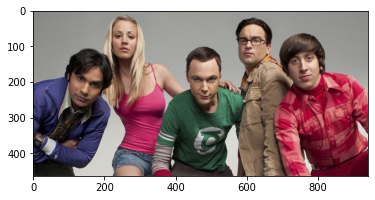

In [114]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(image)
# plt.colorbar()
# plt.grid(False)


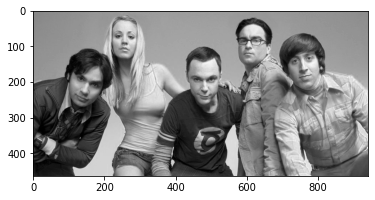

In [115]:
import numpy as np
# shape a b c, a 是最外层平铺， b是如关注的第一个元素，c是再往第一个元素的内嵌内嵌
# 把 3 通道改为 1 通道， 通道维度 index 是 2， 按照 [True, False, False] 选出了第一个通道
image0 = np.compress([True, False, False], image, axis=2)
print(image0.shape)

shape3 = image0.shape

# Well your images should either be (M, N) or (M, N, 3) or (M, N, 4) according to the documentation
# 一通道图片形状需要是 (n, m)
image0 = image0.reshape((shape3[0], shape3[1]))
print(image0.shape)
plt.imshow(image0, cmap=plt.get_cmap('gray'))


(464, 940) 0.00392156862745098


<Figure size 432x288 with 0 Axes>

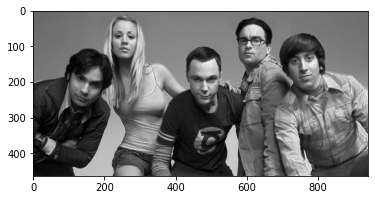

<Figure size 432x288 with 0 Axes>

In [118]:
# print(image0)
# print(image0 / 255)
image0 = image0 / 255
print(image0.shape, np.sum(image0))
plt.imshow(image0, cmap=plt.get_cmap('gray'))
plt.figure()

(464, 940)
[[2.29273661e-06 2.29273661e-06 2.29273661e-06 ... 2.29273661e-06
  2.29273661e-06 2.29273661e-06]
 [2.29273661e-06 2.29273661e-06 2.29273661e-06 ... 2.29273661e-06
  2.29273661e-06 2.29273661e-06]
 [2.29273661e-06 2.29273661e-06 2.29273661e-06 ... 2.29273661e-06
  2.29273661e-06 2.29273661e-06]
 ...
 [2.29273662e-06 2.29273662e-06 2.29273662e-06 ... 2.29273662e-06
  2.29273662e-06 2.29273662e-06]
 [2.29273662e-06 2.29273662e-06 2.29273662e-06 ... 2.29273662e-06
  2.29273662e-06 2.29273662e-06]
 [2.29273662e-06 2.29273662e-06 2.29273662e-06 ... 2.29273662e-06
  2.29273662e-06 2.29273662e-06]] 0.9999999999999994


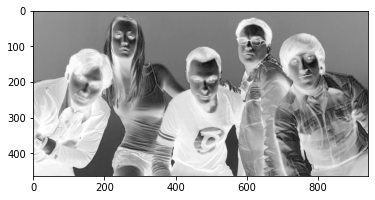

In [119]:


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    # return np.exp(x) / np.sum(np.exp(x), axis=0)
    # all sum not just one axis
    return np.exp(-x) / np.sum(np.exp(-x))
image0 = softmax(image0)
print(image0.shape) 
print(image0, np.sum(image0))
plt.figure()
plt.imshow(image0, cmap=plt.get_cmap('gray'))